#                Doctor's Consultation Fees Prediction

### Problem Statement:

####  We Predict  Doctor's Consultation Fee  

Size of training set: 5961 records

Size of test set: 1987 records



WORK:
1) IMPORTING LIBRARIES

2) LOADING TRAIN DATASET & DESCRIPTION

3) DATA PREPROCESSING OF TRAIN DATA

4) EXPLORATORY DATA ANALYSIS

5) SPLITING DATA AND APPLYING train_test_split

6) PREDICTING MODEL 

7) GRID SEARCH CV

9) TUNNING WITH BEST PARAMETERS

10) SAVING OUR MODEL

11) LOATING TEST DATASET

12) DATA PREPROCESSING & CLEANING OF TEST DATASET

13) LOADING THE TEST DATA ON TRAINED DATA

14) RESULTS & CONCLUSION

In this context, the use regression models to predict the consultation fees of Doctors.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Importing Data

Data is in excel format. So, we will use pd.read_excel function to read data.

In [2]:
df_train = pd.read_excel('Final_Train.xlsx')

In [3]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
df_train.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [6]:
df_train.shape

(5961, 7)

In [7]:
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

ATTRIBUTES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [9]:
df_train.columns.size

7

In [10]:
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

We can see that all the attributes of our dataset are in string format, except our target variable i.e. "Fees".

# DESCRIBING DATA

In [11]:
df_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


describe function only shows our target variable "Fees" as all other attributes are in string format and describe function don't shows the string variables.

max fees charged by doctor is = 950

min fees charged by doctore is = 5

mean of "fees"= 307.9

Standard deviation of "fess"= 190.9

In [12]:
# check unique values in dataset

df_train.apply(lambda x: len(x.unique()))

Qualification         1420
Experience              64
Rating                  52
Place                  878
Profile                  6
Miscellaneous_Info    2999
Fees                    40
dtype: int64

In [12]:
# Look at the values in each columns 
for i in df_train:
    print(df_train[i].value_counts())
    print("____________________________________________________________")

BDS                                                                                                            488
BHMS                                                                                                           477
BAMS                                                                                                           471
MBBS                                                                                                           334
MBBS, MS - ENT                                                                                                 220
                                                                                                              ... 
MBBS, MS - ENT, Diploma in Otorhinolaryngology (DLO), Fellow of the Royal College of Surgeons of Ireland         1
B.Sc, MD - Homeopathy                                                                                            1
Diploma in Otorhinolaryngology (DLO), MBBS, MRCS (UK)                           

# CLEANING OUR DATASET

Data Cleaning and pre-processing is very important part to create any machine learning model. The cleaner the data will be, the better the prediction will come. 

This data provided is raw and we have to run many functions to clean.

##### 1) Extract Year of experience from "Experience" column and convert it to Numeric

In [14]:
# EXPERIENCE

df_train['Experience'] = df_train['Experience'].str.split().str[0]
df_train['Experience'] = df_train['Experience'].astype(int)

In [15]:
df_train.head(1)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100


In [16]:
# we can see that Experience has numeric value now.

##  checking missing values

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int32 
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 302.8+ KB


In [18]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

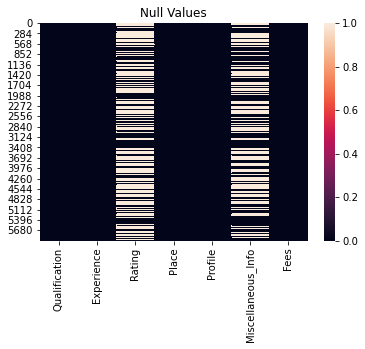

In [19]:
# visualizing null values through heat-map

sns.heatmap(df_train.isnull())
plt.title("Null Values")
plt.show()

Visualization:
    
we have null values under "Rating","Place" & "Miscellaneous_info".

Now, we will treat these NaN values:

#####  2) Treating the column "Place"

In [20]:
df_train.Place.fillna('Unknown,Unknown',inplace=True)


df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [21]:
## creating different columns for "place" as "city" & "area"

In [22]:
df_train['area'] = df_train['Place'].str.split(",").str[0]
df_train['city'] = df_train['Place'].str.split(",").str[1]

# we can drop the place variable

df_train.drop('Place',axis=1,inplace=True)

df_train.head(1)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,area,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam


##### 3) Treating "Rating" Column

Rating has more then 50 percent of NaN values. So, first we have to deal with them, then we will convert Rating to int.

In [23]:
df_train['Rating'].fillna('-99%',inplace=True)


# extract value of rating to avoid '%' and convert to numeric.

df_train['Rating'] = df_train['Rating'].str.slice(stop=-1).astype(int)

df_train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
area                     0
city                     1
dtype: int64

In [24]:
df_train["Rating"].value_counts().sort_index()

-99     3302
 7         1
 33        2
 36        1
 40        1
 45        1
 47        1
 48        1
 53        1
 55        2
 56        5
 57        3
 58        1
 60        7
 62        2
 63        2
 64        2
 65        1
 67       12
 68        5
 69        4
 70        4
 71        9
 72        3
 73        8
 74        7
 75        8
 76        9
 77       16
 78        6
 79       13
 80       19
 81       12
 82       23
 83       21
 84       13
 85       27
 86       21
 87       14
 88       41
 89       42
 90       66
 91       60
 92       66
 93      109
 94      115
 95      178
 96      220
 97      241
 98      290
 99      259
 100     684
Name: Rating, dtype: int64

In [25]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_train["Rating"] = pd.cut(df_train["Rating"],bins=bins,labels=labels,include_lowest=True)

In [26]:
df_train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

##### 4) treating the "Miscellaneous_info" column:

we can't find any important information under "Miscellaneous_info" column which is relevant to our predictions.
Hence, we are droping this column.

In [27]:
# droping Miscellaneous_info

df_train.drop(["Miscellaneous_Info"], axis=1,inplace=True)

df_train.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
area             0
city             1
dtype: int64

In [28]:
# 1 missing value under city.
# Replace NaN with "Unknown"

df_train['city'].fillna('Unknown',inplace=True)

In [29]:
df_train.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
area             0
city             0
dtype: int64

### Now, there is no missing vale present in out training datset.

In [30]:
## QUALIFICATION

In [31]:
df_train["Qualification"]=df_train["Qualification"].str.split(",")
Qualification ={}
for x in df_train["Qualification"].values:
    for i in x:
        i = i.strip()
        if i in Qualification:
            Qualification[i]+=1
        else:
            Qualification[i]=1

In [32]:
most_qualification = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qualification =[]
for y in most_qualification:
    final_qualification.append(y[0])

In [33]:
for title in final_qualification:
    df_train[title]=0
    
for x,y in zip(df_train["Qualification"].values,np.array([idx for idx in range(len(df_train))])):
    for q in x:
        q = q.strip()
        if q in final_qualification:
            df_train[q][y] = 1
            

# Droping column "Qualification"            

df_train.drop("Qualification",axis=1,inplace=True)

In [34]:
df_train.head(5)

,Experience,Rating,Profile,Fees,area,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


# EXPLORATORY DATA ANALYSIS

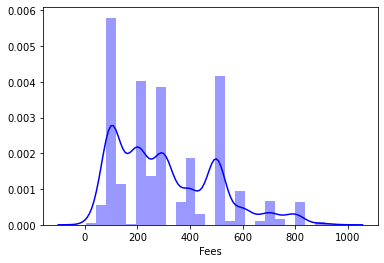

In [35]:
# Visualizing our target variable

sns.distplot(df_train["Fees"], kde=True,color = 'blue')

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

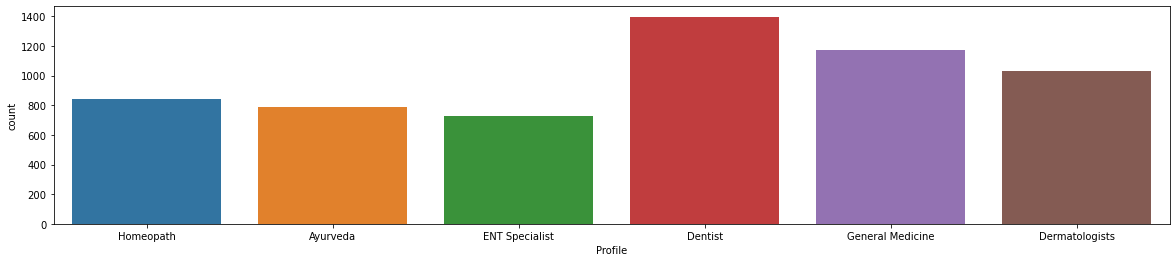

In [36]:
# Visualizing "Profile"

plt.subplots(figsize=(20,4))
sns.countplot(x="Profile",data=df_train)

df_train['Profile'].unique()

 No of dentist are more in this dataset.

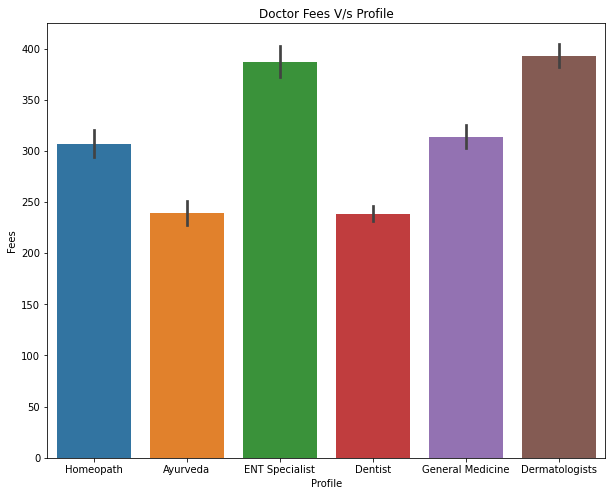

In [41]:
# visualizing profile with our target variable "Fees"


plt.figure(figsize=(10,8))
sns.barplot(x='Profile',y='Fees',data=df_train)
plt.title("Doctor Fees V/s Profile")

plt.show()

Consultation fees charged by "dermatoligists" & " ENT specialists" are higher.

Consultation fees charged by "Ayurveda" & "Dentists" are quite lower.

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5'], dtype=object)

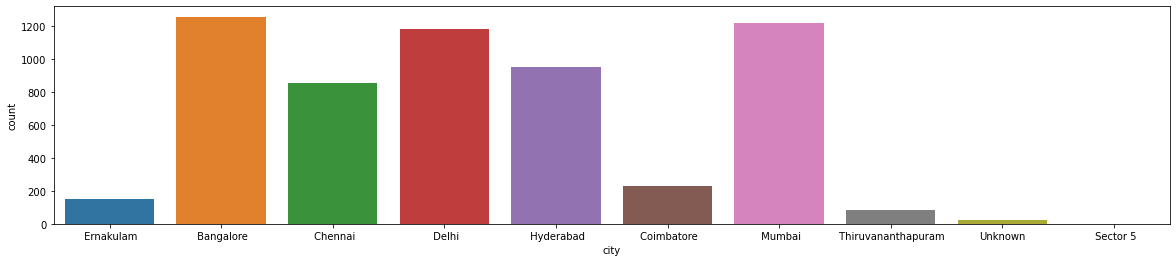

In [42]:
plt.subplots(figsize=(20,4))
sns.countplot(x="city",data=df_train)

df_train['city'].unique()

Highest number of doctors are avaiable in "Bangalore", "Delhi", "MUmbai".

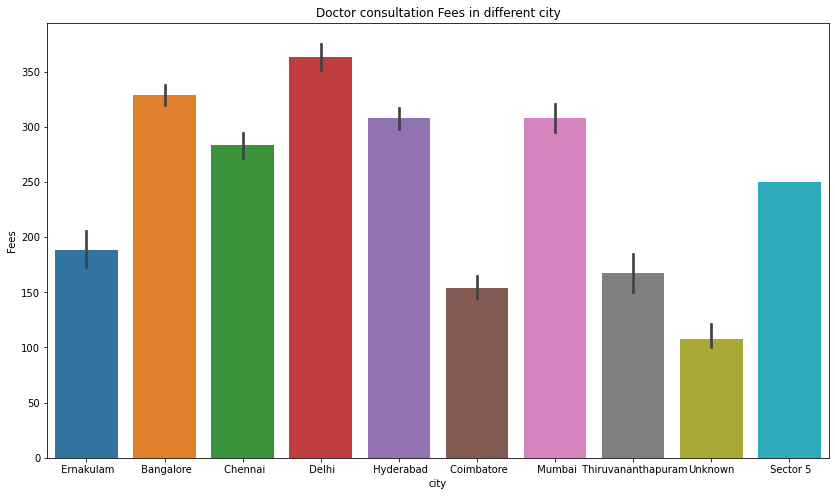

In [44]:
# visualizing "city" with our target variable "Fees"

plt.figure(figsize=(14,8))
sns.barplot(x='city',y='Fees',data=df_train)
plt.title("Doctor consultation Fees in different city")

plt.show()

Highest fees charged by doctors is in city "Delhi".

In [45]:
## creating dummies for CITY & PROFILE

In [46]:
df_train = pd.get_dummies(df_train,columns=["city","Profile"],prefix=["city","Profile"])

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Experience                            5961 non-null   int32   
 1   Rating                                5961 non-null   category
 2   Fees                                  5961 non-null   int64   
 3   area                                  5961 non-null   object  
 4   MBBS                                  5961 non-null   int64   
 5   BDS                                   5961 non-null   int64   
 6   BAMS                                  5961 non-null   int64   
 7   BHMS                                  5961 non-null   int64   
 8   MD - Dermatology                      5961 non-null   int64   
 9   MS - ENT                              5961 non-null   int64   
 10  Venereology & Leprosy                 5961 non-null   int64   
 11  MD -

In [48]:
df_train.drop("city_ Sector 5",axis=1,inplace=True)

# ENCODING

In [49]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

In [50]:
for i in df_train.columns:
    if df_train[i].dtypes== "object":
        df_train[i]=enc.fit_transform(df_train[i].values.reshape(-1,1))

In [51]:
df_train

,Experience,Rating,Fees,area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,city_ Hyderabad,city_ Mumbai,city_ Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,100,296.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,350,856.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,452.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,68.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,250,335.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,300,70.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,100,535.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,600,215.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,100,841.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [52]:
corr= df_train.corr()
corr

,Experience,Fees,area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,city_ Hyderabad,city_ Mumbai,city_ Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
Experience,1.000000,0.002117,0.002229,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,...,-0.054732,0.053884,-0.014791,-0.092512,-0.042496,-0.201596,-0.096003,0.082435,0.335864,-0.070010
Fees,0.002117,1.000000,-0.062557,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,...,-0.000997,0.000925,-0.089157,-0.069429,-0.140812,-0.202126,0.204426,0.155084,0.015463,-0.003072
area,0.002229,-0.062557,1.000000,0.015329,0.017589,-0.031266,-0.003369,-0.020938,-0.001847,-0.010984,...,-0.051858,-0.159362,0.066303,0.098995,-0.031609,0.019840,-0.020202,-0.005244,0.045502,-0.018460
MBBS,0.271347,0.271038,0.015329,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,...,0.036254,-0.051340,-0.063328,-0.057298,-0.364432,-0.520789,0.419355,0.358680,0.499656,-0.375863
BDS,-0.196268,-0.198635,0.017589,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,...,-0.003589,-0.065901,0.078242,-0.029956,-0.212086,0.983629,-0.249302,-0.202977,-0.269357,-0.220862
BAMS,-0.047150,-0.139891,-0.031266,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,...,-0.019987,0.102361,0.021094,-0.025339,0.977884,-0.211808,-0.175383,-0.142793,-0.186964,-0.153933
BHMS,-0.114191,-0.002423,-0.003369,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,...,-0.019823,0.035203,-0.011855,-0.025072,-0.147626,-0.209572,-0.172193,-0.141285,-0.186217,0.930441
MD - Dermatology,-0.067704,0.163811,-0.020938,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,...,0.017416,-0.029916,-0.040663,-0.022245,-0.130983,-0.185944,0.729248,-0.123660,-0.163558,-0.136402
MS - ENT,0.093778,0.128413,-0.001847,0.263449,-0.148092,-0.104182,-0.103082,-0.091460,1.000000,-0.061872,...,-0.013687,-0.014853,-0.032925,-0.018012,-0.106055,-0.150557,-0.124665,0.719488,-0.126366,-0.110443
Venereology & Leprosy,-0.120213,0.113091,-0.010984,0.213185,-0.123730,-0.087044,-0.086124,0.637946,-0.061872,1.000000,...,0.025972,-0.022928,-0.027508,-0.015049,-0.088608,-0.125789,0.492208,-0.082433,-0.110584,-0.092275


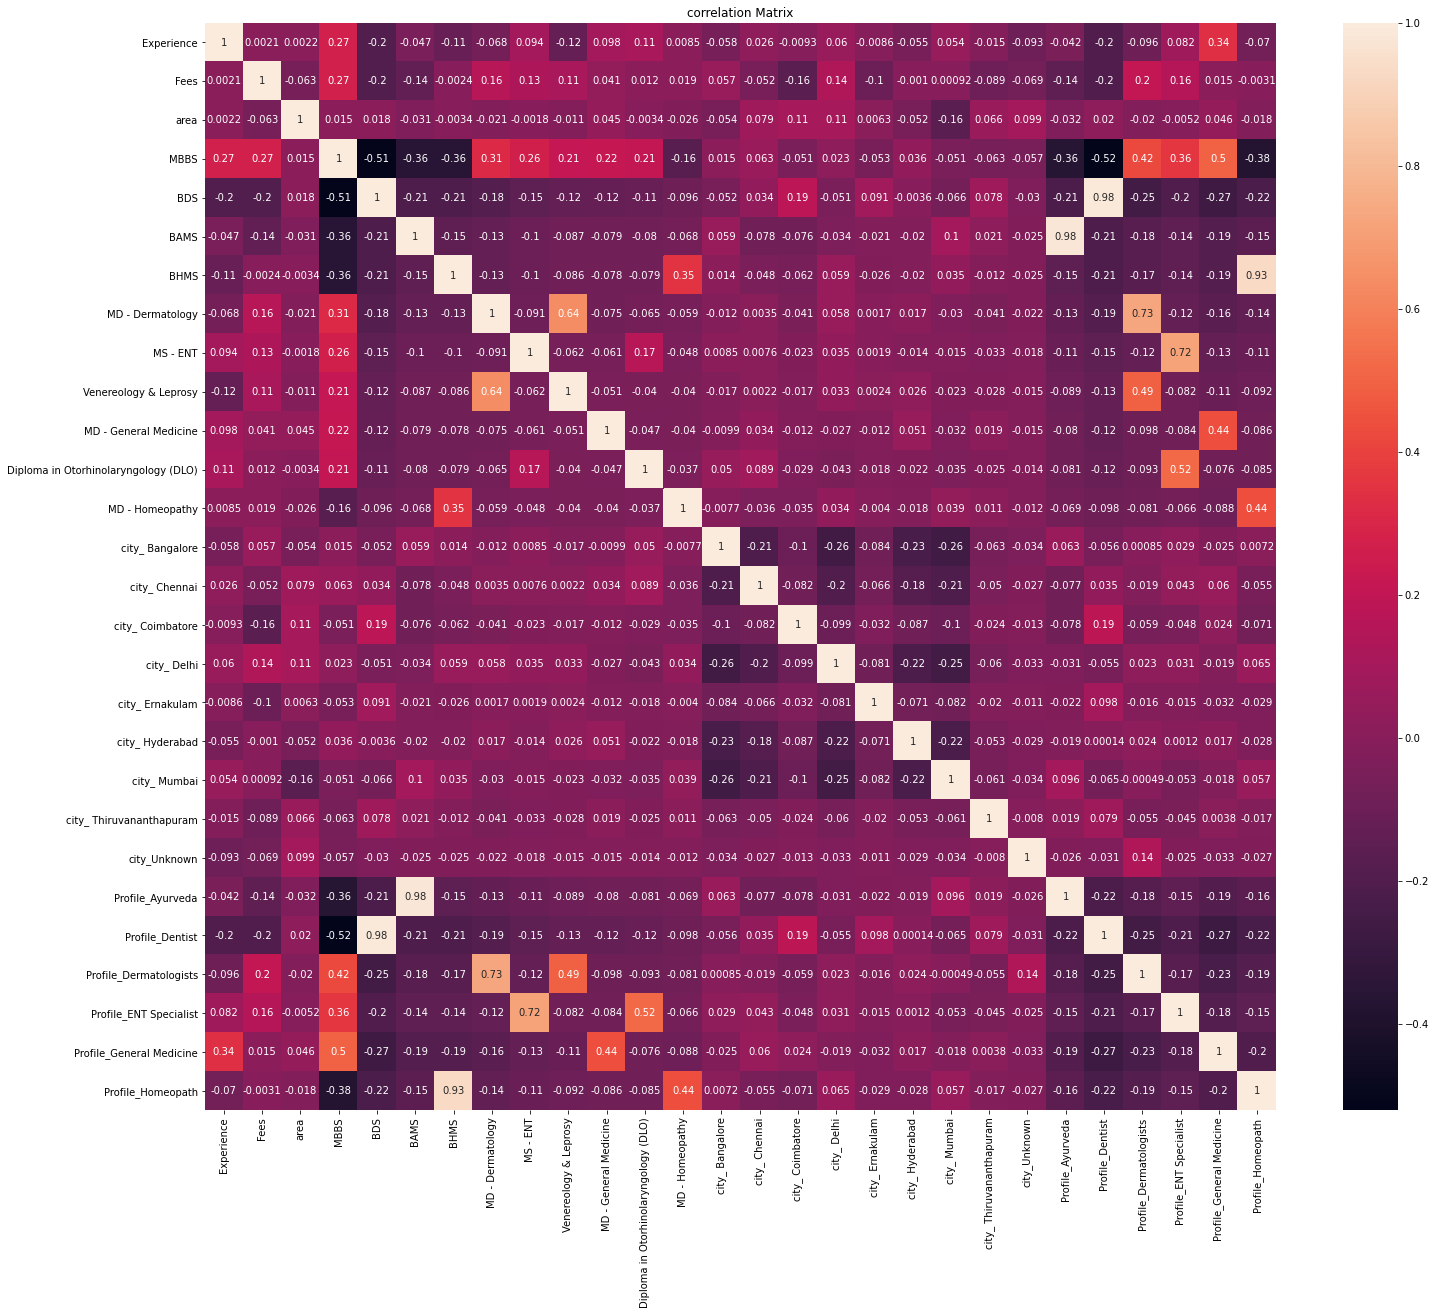

In [53]:
corr_mat=df_train.corr()   

plt.figure(figsize=[24,20])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [45]:
corr_matrix=df_train.corr()
corr_matrix["Fees"].sort_values(ascending=False)

Fees                                    1.000000
MBBS                                    0.271038
Profile_Dermatologists                  0.204426
MD - Dermatology                        0.163811
Profile_ENT Specialist                  0.155084
city_ Delhi                             0.143594
MS - ENT                                0.128413
Venereology & Leprosy                   0.113091
city_ Bangalore                         0.056616
MD - General Medicine                   0.040921
MD - Homeopathy                         0.018601
Profile_General Medicine                0.015463
Diploma in Otorhinolaryngology (DLO)    0.011560
Experience                              0.002117
city_ Mumbai                            0.000925
city_ Hyderabad                        -0.000997
BHMS                                   -0.002423
Profile_Homeopath                      -0.003072
city_ Chennai                          -0.052178
area                                   -0.062557
city_Unknown        

<function matplotlib.pyplot.show(*args, **kw)>

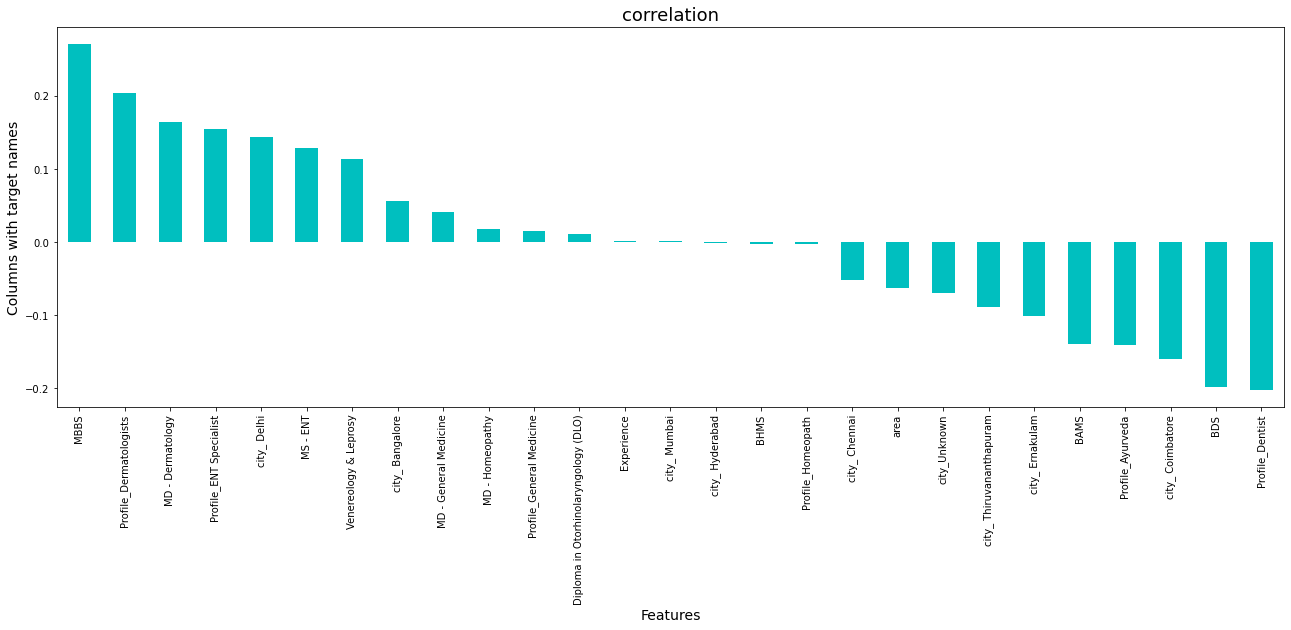

In [54]:
plt.figure(figsize=(22,7))
df_train.corr()["Fees"].sort_values(ascending=False).drop(["Fees"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

OBSERVATIONS:

we can see that there is not such a strong relationship of attributes with our target varaible beacuse all the varaibles were given in String format.
    
    

In [55]:
df_train

,Experience,Rating,Fees,area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,city_ Hyderabad,city_ Mumbai,city_ Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,100,296.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,350,856.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,452.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,68.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,250,335.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,300,70.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,100,535.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,600,215.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,100,841.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Splitting the data into X & Y

x-----> INDEPENDENT VARIABLE

y-----> DEPENDENT VARIABLE------> "Fees"

In [56]:
x= df_train.drop("Fees",axis=1)     # independent variable
y= df_train["Fees"]                # dependent variable

In [57]:
x.columns

Index(['Experience', 'Rating', 'area', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_ Bangalore', 'city_ Chennai',
       'city_ Coimbatore', 'city_ Delhi', 'city_ Ernakulam', 'city_ Hyderabad',
       'city_ Mumbai', 'city_ Thiruvananthapuram', 'city_Unknown',
       'Profile_Ayurveda', 'Profile_Dentist', 'Profile_Dermatologists',
       'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath'],
      dtype='object')

# SCALING

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [59]:
x

,Experience,Rating,area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,city_ Hyderabad,city_ Mumbai,city_ Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0.363636,1.0,0.341801,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.181818,1.0,0.988453,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.136364,0.0,0.521940,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.181818,0.0,0.078522,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.303030,1.0,0.386836,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.287879,1.0,0.080831,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5957,0.500000,0.0,0.617783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5958,0.621212,1.0,0.248268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5959,0.227273,0.9,0.971132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Now, all the x columns range is in 0-1.


# IMPORTING train_test_split

In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20)

### SUPPORT VECTOR REGRESSOR

In [61]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# to use RMSLE we will create our own scorer

from sklearn.metrics import make_scorer

In [62]:
# calculate RMSLE

def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    

In [63]:
# Define scorer

scorer = make_scorer(score,greater_is_better=True)

In [64]:
knn = KNeighborsRegressor()
svm = SVR(gamma='scale')
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [65]:
for i in (knn, svm, dt, rf):
    i.fit(x_train, y_train)
    
    y_pred = i.predict(x_test)
    
    print(i, score(y_pred,y_test))

KNeighborsRegressor() 0.7887742104489475
SVR() 0.8078692092717125
DecisionTreeRegressor() 0.67404711234002
RandomForestRegressor() 0.8120640760188856


# Hyperparameter tunning with best model

In [66]:
## importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [67]:
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}

In [68]:
clf=GridSearchCV(svm,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [69]:
clf_pred=clf.best_estimator_.predict(x_test)

In [70]:
svm = SVR(gamma='scale', kernel="rbf", C=10)

In [71]:
svm.fit(x_train,y_train)

SVR(C=10)

In [72]:
score(y_test,clf_pred)

0.8190712410322704

# SAVING OUR MODEL

In [73]:
import pickle
filename= "Doctor_fees_svm.pkl"
pickle.dump(svm,open(filename,"wb"))

# USING THE TEST DATA

In [74]:
#loading the test data

df_test= pd.read_excel("Final_Test.xlsx")

In [75]:
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [76]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [77]:
df_test.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500"


In [78]:
df_test.shape

(1987, 6)

In [79]:
df_test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [80]:
df_test.columns.size

6

In [81]:
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [82]:
# check unique values in dataset

df_test.apply(lambda x: len(x.unique()))

Qualification          630
Experience              57
Rating                  37
Place                  593
Profile                  6
Miscellaneous_Info    1085
dtype: int64

# CLEANING OUR DATASET

#### Extract Experience Year from Experience column and convert to Numeric

In [83]:
# EXPERIENCE

df_test['Experience'] = df_test['Experience'].str.split().str[0]
df_test['Experience'] = df_test['Experience'].astype(int)

##### checking missing values

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   int32 
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: int32(1), object(5)
memory usage: 85.5+ KB


In [85]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

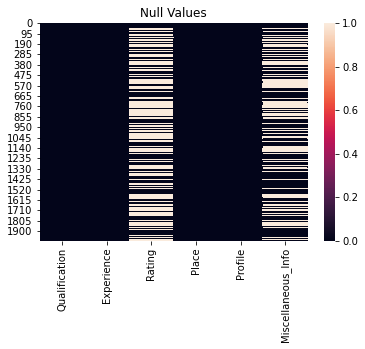

In [86]:
# visualizing null values through heat-map

sns.heatmap(df_test.isnull())
plt.title("Null Values")
plt.show()

In [87]:
# First treating the column "Place"


df_test.Place.fillna('Unknown,Unknown',inplace=True)

In [88]:
df_test['area'] = df_test['Place'].str.split(",").str[0]
df_test['city'] = df_test['Place'].str.split(",").str[1]

# we can drop the place variable

df_test.drop('Place',axis=1,inplace=True)

df_test.head(1)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,area,city
0,MBBS,35,NaN,General Medicine,NaN,Ghatkopar East,Mumbai


#### Rating Column

Rating has more then 50% of missing values so first we have to deal with them, then convert Rating to int

In [89]:
df_test['Rating'].fillna('-99%',inplace=True)


# extract value of rating to avoid '%' and convert to numeric
df_test['Rating'] = df_test['Rating'].str.slice(stop=-1).astype(int)

df_test.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Profile                 0
Miscellaneous_Info    834
area                    0
city                    0
dtype: int64

In [90]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_test["Rating"] = pd.cut(df_test["Rating"],bins=bins,labels=labels,include_lowest=True)

In [91]:
df_test['Rating'].value_counts().sort_index()

0     1090
1        0
2        0
3        0
4        0
5        0
6        9
7       14
8       27
9      108
10     739
Name: Rating, dtype: int64

In [92]:
# droping Miscellaneous_info

df_test.drop(["Miscellaneous_Info"], axis=1,inplace=True)

df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
area             0
city             0
dtype: int64

In [93]:
## QUALIFICATION

In [94]:
df_test["Qualification"]=df_test["Qualification"].str.split(",")
Qualification ={}
for x in df_test["Qualification"].values:
    for i in x:
        i = i.strip()
        if i in Qualification:
            Qualification[i]+=1
        else:
            Qualification[i]=1

In [95]:
most_qualification = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qualification =[]
for y in most_qualification:
    final_qualification.append(y[0])

In [96]:
for title in final_qualification:
    df_test[title]=0
    
for x,y in zip(df_test["Qualification"].values,np.array([idx for idx in range(len(df_test))])):
    for q in x:
        q = q.strip()
        if q in final_qualification:
            df_test[q][y] = 1
            

# Droping column "Qualification"            

df_test.drop("Qualification",axis=1,inplace=True)

In [97]:
df_test.head(5)

,Experience,Rating,Profile,area,city,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,0,General Medicine,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,0,ENT Specialist,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40,7,Dermatologists,KK Nagar,Chennai,1,0,0,0,0,0,0,0,0,1
3,0,0,Ayurveda,New Ashok Nagar,Delhi,0,0,0,1,0,0,0,0,0,0
4,16,10,Dentist,Kanakpura Road,Bangalore,0,1,0,0,0,0,0,0,0,0


# EXPLORATORY DATA ANALYSIS

array([' Mumbai', ' Hyderabad', ' Chennai', ' Delhi', ' Bangalore',
       ' Coimbatore', ' Thiruvananthapuram', ' Ernakulam', 'Unknown'],
      dtype=object)

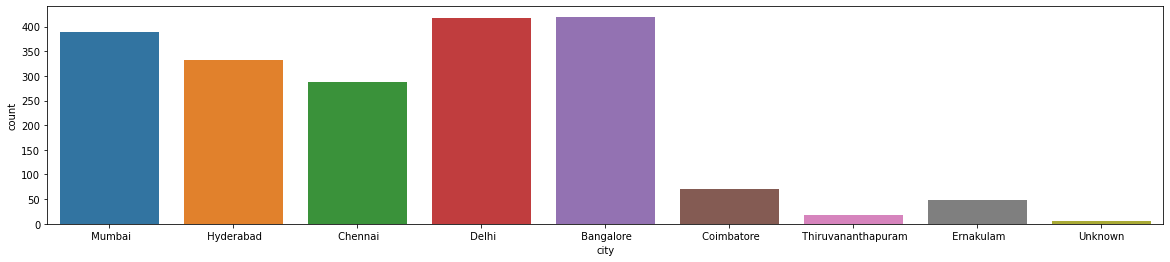

In [98]:
plt.subplots(figsize=(20,4))
sns.countplot(x="city",data=df_test)

df_test['city'].unique()

array(['General Medicine', 'ENT Specialist', 'Dermatologists', 'Ayurveda',
       'Dentist', 'Homeopath'], dtype=object)

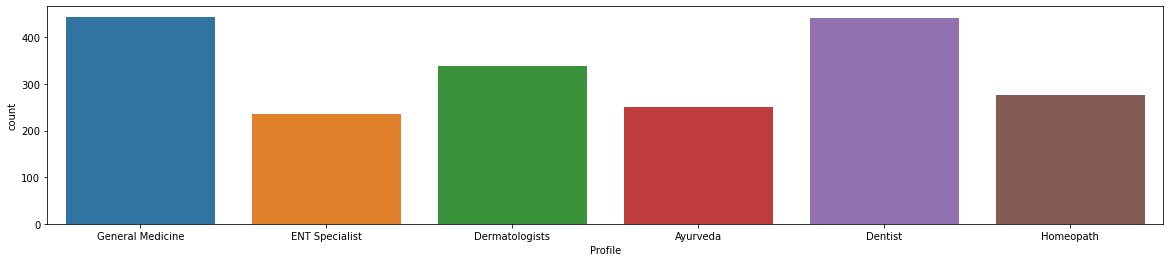

In [99]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Profile",data=df_test)

df_test['Profile'].unique()

In [100]:
df_test = pd.get_dummies(df_test,columns=["city","Profile"],prefix=["city","Profile"])

In [101]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Experience                            1987 non-null   int32   
 1   Rating                                1987 non-null   category
 2   area                                  1987 non-null   object  
 3   MBBS                                  1987 non-null   int64   
 4   BDS                                   1987 non-null   int64   
 5   BHMS                                  1987 non-null   int64   
 6   BAMS                                  1987 non-null   int64   
 7   MD - Dermatology                      1987 non-null   int64   
 8   MS - ENT                              1987 non-null   int64   
 9   MD - General Medicine                 1987 non-null   int64   
 10  Venereology & Leprosy                 1987 non-null   int64   
 11  Dipl

# ENCODING

In [102]:
for i in df_test.columns:
    if df_test[i].dtypes== "object":
        df_test[i]=enc.fit_transform(df_test[i].values.reshape(-1,1))

In [103]:
df_test

,Experience,Rating,area,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,...,city_ Hyderabad,city_ Mumbai,city_ Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,0,142.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,31,0,578.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,40,7,212.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,373.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,16,10,231.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0,58.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1983,4,0,96.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1984,9,0,423.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1985,12,10,26.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [104]:
df_test.columns.size

28

In [105]:
df_train.columns.size

29

# SCALING

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df_test=pd.DataFrame(scaler.fit_transform(df_test), columns= df_test.columns)

In [107]:
df_test

,Experience,Rating,area,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,...,city_ Hyderabad,city_ Mumbai,city_ Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0.538462,0.0,0.241087,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.476923,0.0,0.981324,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.615385,0.7,0.359932,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.0,0.633277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.246154,1.0,0.392190,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,0.153846,0.0,0.098472,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1983,0.061538,0.0,0.162988,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1984,0.138462,0.0,0.718166,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1985,0.184615,1.0,0.044143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# LOAD THE MODEL

In [108]:
fitted_model=pickle.load(open("Doctor_fees_svm.pkl", "rb"))

In [109]:
fitted_model

SVR(C=10)

In [112]:
# Predction over test data

Conclusion= fitted_model.predict(df_test)

# CONCLUSION

In [113]:
predictions

array([233.26812208, 260.5915    , 305.98253212, ..., 220.69827111,
       227.92375893, 309.76743836])